# 1 引言

在机器学习常用的优化算法中，梯度下降法和最小二乘法占尽了风骚。梯度下降法上一篇中已经详细介绍过了，那么这一篇，我们继续说一说最小二乘法。

# 2 什么是最小二乘法

在描述度量模型准确程度方面有多种不同的方法：

（1）误差和最小化。这种方法存在的问题是正负误差会相互抵消，导致描述不准确。

（2）误差绝对值最小化。这个方法在描述上面有问题，但是计算机上运算很复杂。

（3）误差平方和最小化。这也是最小二乘法根本思想所在，不仅有效避免正负误差抵消，而且运算上也简单。

在字面上，我们将“最小二乘”拆分成两个词语，就是“最小”和“二乘”。其中，“二乘”指的就是以平方的方式来衡量预测值与实际值之间的差异，也就是误差平方。“最小”就好理解了，就是说预测模型中各参数要使得预测值与实际值之间的误差平方和最小。

要说最小二乘法的定义，总结多方面资料，我认为分为两派：

一类是广义上的最小二乘法。这一类的最小二乘法泛指所有使用均方误差和方法来衡量差异程度进而求最优值得方法，这一类方法并不关注如何求最优解，只要使用了均方误差和作为目标函数，就算法最小二乘法，从这种角度来说，最小二乘法是一种优化思想，而梯度下降法只是最小二乘法的一个分支，一种具体实现。

另一派是狭义上的最小二乘法：这一类的最小二乘法不但使用均方误差和最为目标函数，且在求最优解时使用的是对应推导出的矩阵运算解法。

本文中，指的是狭义上的最小二乘法。

# 3 求解过程

最小二乘法具体怎么求解呢？我们先以一元线性模型为例来说明。

假设有一组数据$X=\{({{x}_{1}},{{y}_{1}},\cdots ,({{x}_{m}},{{y}_{m}})\}$，我们希望求出对应的一元线性模型来拟合这一组数据：

$$y={{\beta }_{0}}+{{\beta }_{1}}x$$

既然要拟合，总要有一个拟合程度高低的判断标准，上文说到，最小二乘法中使用的就是误差平方和方法，所以，这时候损失函数，或者说我们的目标函数就是：

$$J(\beta )=\sum\limits_{i=0}^{m}{{{({{y}_{i}}-{{\beta }_{1}}{{x}_{i}}-{{\beta }_{0}})}^{2}}}=\sum\limits_{i=0}^{m}{{{(f({{x}_{i}})-{{\beta }_{1}}{{x}_{i}}-{{\beta }_{0}})}^{2}}}$$

有了这个目标函数，我们要做的就是求出${{\beta }_{0}}$和${{\beta }_{1}}$使得$J(\beta )$最小，在这里就是极小值。

上一篇中我们说到，求极值的一个很好的方法就是求导，在这里因为有多个参数，所以，我们要分别对${{\beta }_{0}}$和${{\beta }_{1}}$求偏导：

$$\frac{\partial J(\beta )}{\partial {{\beta }_{1}}}=\sum\limits_{i=0}^{m}{2({{y}_{i}}-{{\beta }_{1}}{{x}_{i}}-{{\beta }_{0}})(-{{x}_{i}})}=2\sum\limits_{i=0}^{m}{({{\beta }_{1}}x_{i}^{2}-{{\beta }_{0}}{{x}_{i}}-{{x}_{i}}{{y}_{i}})}$$

$$\frac{\partial J(\beta )}{\partial {{\beta }_{0}}}=\sum\limits_{i=0}^{m}{2({{y}_{i}}-{{\beta }_{1}}{{x}_{i}}-{{\beta }_{0}})(-1)}=2\sum\limits_{i=0}^{m}{({{\beta }_{1}}{{x}_{i}}+{{\beta }_{0}}-{{y}_{i}})(-1)}=2(m{{\beta }_{1}}\frac{\sum\limits_{1}^{m}{{{x}_{i}}}}{m}+m{{\beta }_{0}}-m\frac{\sum\limits_{1}^{m}{{{y}_{i}}}}{m})$$

因为$\bar{x}=\frac{\sum\limits_{1}^{m}{{{x}_{i}}}}{m}$,$\bar{y}=\frac{\sum\limits_{1}^{m}{{{y}_{i}}}}{m}$, 所以，上面第二个，也就是对${{\beta }_{0}}$的偏导可以转化为：

$$\frac{\partial J(\beta )}{\partial {{\beta }_{0}}}=2(m{{\beta }_{1}}\bar{x}+m{{\beta }_{0}}-m\bar{y})$$

我们知道，目标函数取得极值时，偏导一定是等于0的，所以，我们令$\frac{\partial J(\beta )}{\partial {{\beta }_{0}}}$等于0，于是有：

$$2(m{{\beta }_{1}}\bar{x}+m{{\beta }_{0}}-m\bar{y})=0$$

$${{\beta }_{0}}=\bar{y}-{{\beta }_{1}}\bar{x}$$

接着，我们继续回到上面第一个偏导，也就是对${{\beta }_{1}}$的偏导$\frac{\partial J(\beta )}{\partial {{\beta }_{1}}}$，令$\frac{\partial J(\beta )}{\partial {{\beta }_{1}}}=0$，并将${{\beta }_{0}}=\bar{y}-{{\beta }_{1}}\bar{x}$代入，得：

$$2\sum\limits_{i=0}^{m}{({{\beta }_{1}}x_{i}^{2}-(\bar{y}-{{\beta }_{1}}\bar{x}){{x}_{i}}-{{x}_{i}}{{y}_{i}})}=0$$

在这一等式中，只有${{\beta }_{1}}$是位置数，所以，我们可以很简单得通过移项求解，最终可得：

$${{\beta }_{1}}=\frac{\sum\limits_{1}^{m}{({{x}_{i}}-\bar{x})({{y}_{i}}-\bar{y})}}{\sum\limits_{1}^{m}{{{({{x}_{i}}-\bar{x})}^{2}}}}$$

这就是${{\beta }_{1}}$代入${{\beta }_{0}}=\bar{y}-{{\beta }_{1}}\bar{x}$，就可以求得${{\beta }_{0}}$，这样，${{\beta }_{0}}$和${{\beta }_{1}}$就都求出来了。

继续，我们尝试求解更一般化的多元线性情况。对于多元的情况，需要使用矩阵运算来求解，先用矩阵表示：

$$X\beta =y$$

其中，$X=\left[ \begin{matrix}
   1 & {{x}_{12}} & \cdots  & {{x}_{1m}}  \\
   1 & {{x}_{22}} & \cdots  & {{x}_{2m}}  \\
   \cdots  & \cdots  & \cdots  & \cdots   \\
   1 & {{x}_{n2}} & \cdots  & {{x}_{nm}}  \\
\end{matrix} \right],\beta =\left[ \begin{matrix}
   {{\beta }_{0}}  \\
   {{\beta }_{1}}  \\
   \cdots   \\
   {{\beta }_{m}}  \\
\end{matrix} \right],y=\left[ \begin{matrix}
   {{y}_{0}}  \\
   {{y}_{1}}  \\
   \cdots   \\
   {{y}_{n}}  \\
\end{matrix} \right]$

目标函数：

$$J(\beta )={{\sum\limits_{i=1}^{m}{\left| {{y}_{i}}-\sum\limits_{j=1}^{n}{{{x}_{ij}}{{\beta }_{j}}} \right|}}^{2}}={{\left\| y-X{{\beta }^{T}} \right\|}^{2}}$$

要求最佳拟合模型，也就是令上面目标函数最小，即为0：

$$y-X{{\beta }^{T}}=0$$

移项得：

$$y=X{{\beta }^{T}}$$

$${{({{X}^{T}}X)}^{-1}}{{X}^{T}}y={{({{X}^{T}}X)}^{-1}}{{X}^{T}}X{{\beta }^{T}}$$

最终获得解：

$${{\beta }^{T}}={{({{X}^{T}}X)}^{-1}}{{X}^{T}}y$$

可以看出，对于一般的最小二乘法多元求解，使用矩阵运算即可，都不需要迭代 。

# 4 最小二乘法与梯度下降法

通过上面推导可知，最小二乘法可以矩阵运算求解，这种方法十分方便快捷，但这种方法不是万能的，因为矩阵运算求解的条件时矩阵$X$可以，但在很多非线性模型中，就未必可逆了，这时候矩阵运算求解就行不通，这时候就可以通过梯度下降法求最优解。来具体说说这两种方法的区别：

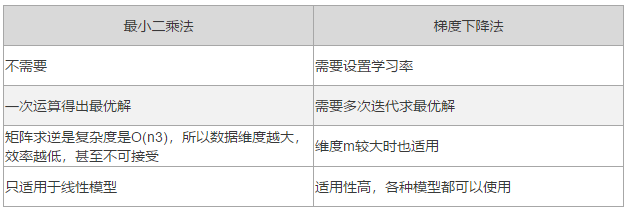

# 5 总结

最小二乘法是机器学习中常用的优化算法，解释性强，求解方便快捷，但对噪声数据过于敏感，且只适用于线性模型，对于非线性模型，可结合梯度下降法等方式使用。

参考：

https://www.datalearner.com/blog/1051539312290417

https://www.cnblogs.com/wangkundentisy/p/7505487.html